In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
movies = pd.read_csv('moviesss.csv')

In [3]:
movies.head(5)

,Unnamed: 0,movie_id,movie_name,year,genre,Unnamed: 5,director,cast
0,0,tt15354916,Jawan,2023,"Action, Thriller",NaN,Atlee,"Shah Rukh Khan, Nayanthara, Vijay Sethupathi, ..."
1,1,tt15748830,Jaane Jaan,2023,"Crime, Drama, Mystery",NaN,Sujoy Ghosh,"Kareena Kapoor, Jaideep Ahlawat, Vijay Varma, ..."
2,2,tt11663228,Jailer,2023,"Action, Comedy, Crime",NaN,Nelson Dilipkumar,"Rajinikanth, Mohanlal, Shivarajkumar, Jackie S..."
3,3,tt14993250,Rocky Aur Rani Kii Prem Kahaani,2023,"Comedy, Drama, Family",NaN,Karan Johar,"Ranveer Singh, Alia Bhatt, Dharmendra, Shabana..."
4,4,tt15732324,OMG 2,2023,"Comedy, Drama",NaN,Amit Rai,"Pankaj Tripathi, Akshay Kumar, Yami Gautam, Pa..."


In [4]:

movies.shape

(2199, 8)

In [5]:
# create a function to create a table showing the numbers of missing values for each feature
def create_missing_df(dataframe):
  
  missing_index = dataframe.columns.tolist() 
  missing = dataframe.isnull().sum().tolist()
  missing_df = pd.DataFrame({'Missing':missing}, index=missing_index)

  return missing_df

In [6]:
create_missing_df(movies)

,Missing
Unnamed: 0,0
movie_id,0
movie_name,0
year,65
genre,0
Unnamed: 5,2199
director,0
cast,0


In [7]:
# the function to extract titles
def extract_title(title):

  year = title[len(title)-5:len(title)-1]

  # some movies do not have the info about year in the column title. So, we should take care of the case as well.
  if year.isnumeric():
    title_no_year = title[:len(title)-7]
    return title_no_year

  else:
    return title

In [12]:
# the function to extract years
def extract_year(title):

  year = title[len(title)-5:len(title)-1]

  # some movies do not have the info about year in the column title. So, we should take care of the case as well.
  if year.isnumeric():
    return int(year)

  else:
    return np.nan
     

In [16]:
r,c = movies[movies['genre']=='(no genre listed)'].shape 
print('The number of movies which do not have info about genres:',r)

The number of movies which do not have info about genres: 0


In [17]:
movies = movies[~(movies['genre']=='(no genre listed)')].reset_index(drop=True)

In [20]:
movies[['movie_name','genre']].head(5)

,movie_name,genre
0,Jawan,"Action, Thriller"
1,Jaane Jaan,"Crime, Drama, Mystery"
2,Jailer,"Action, Comedy, Crime"
3,Rocky Aur Rani Kii Prem Kahaani,"Comedy, Drama, Family"
4,OMG 2,"Comedy, Drama"


In [22]:
# remove '|' in the genres column
movies['genre'] = movies['genre'].str.replace('|',' ')

In [23]:
# count the number of occurences for each genre in the data set
counts = dict()

for i in movies.index:
  for g in movies.loc[i,'genre'].split(' '):
    if g not in counts:
      counts[g] = 1
    else:
      counts[g] = counts[g] + 1
     

Text(0, 0.5, 'Counts')

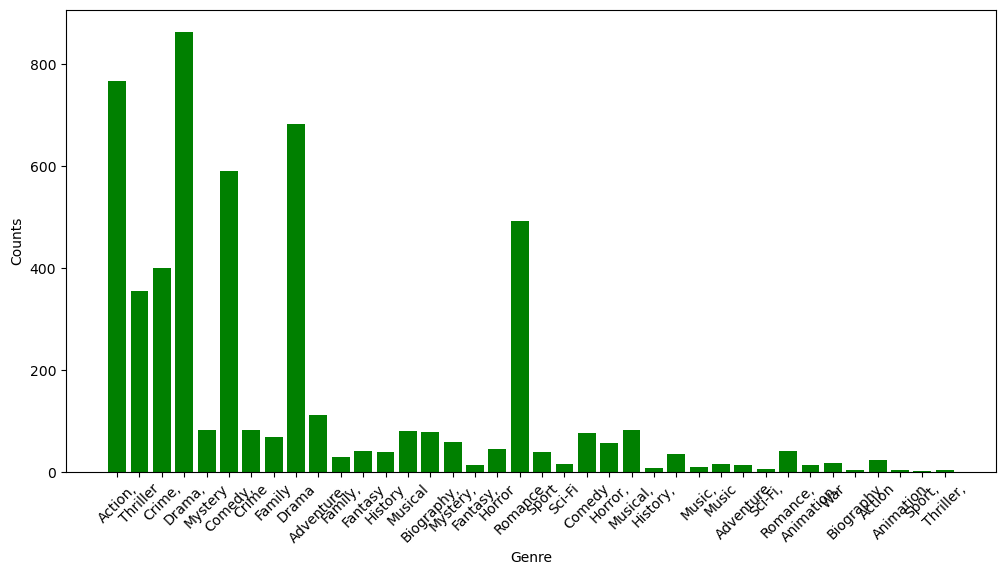

In [24]:

plt.figure(figsize=(12,6))
plt.bar(list(counts.keys()), counts.values(), color='g')
plt.xticks(rotation=45)
plt.xlabel('Genre')
plt.ylabel('Counts')

In [25]:

from sklearn.feature_extraction.text import TfidfVectorizer

In [26]:

movies['genre'] = movies['genre'].str.replace('Sci-Fi','SciFi')
movies['genre'] = movies['genre'].str.replace('Film-Noir','Noir')

In [27]:
tfidf_vector = TfidfVectorizer(stop_words='english') # create an object for TfidfVectorizer
tfidf_matrix = tfidf_vector.fit_transform(movies['genre']) # apply the object to the genres column

In [31]:
print(list(enumerate(tfidf_vector.get_feature_names_out())))


[(0, 'action'), (1, 'adventure'), (2, 'animation'), (3, 'biography'), (4, 'comedy'), (5, 'crime'), (6, 'drama'), (7, 'family'), (8, 'fantasy'), (9, 'history'), (10, 'horror'), (11, 'music'), (12, 'musical'), (13, 'mystery'), (14, 'romance'), (15, 'scifi'), (16, 'sport'), (17, 'thriller'), (18, 'war')]


In [32]:

print(tfidf_matrix[:5])

  (0, 17)	0.8114835857284116
  (0, 0)	0.5843752134488249
  (1, 13)	0.7949660477750663
  (1, 6)	0.28724084470348255
  (1, 5)	0.5343422873205163
  (2, 4)	0.5619867486766731
  (2, 5)	0.6445963317885108
  (2, 0)	0.5183304576779354
  (3, 7)	0.8463033071775466
  (3, 4)	0.4534377107173237
  (3, 6)	0.2795799612986949
  (4, 4)	0.8512043822034329
  (4, 6)	0.524834354551674


In [33]:
tfidf_matrix.shape

(2199, 19)

In [38]:

# the first row vector of tfidf_matrix 
tfidf_matrix.todense()[0]

matrix([[0.58437521, 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.81148359, 0.        ]])

In [35]:
from sklearn.metrics.pairwise import linear_kernel

In [36]:

sim_matrix = linear_kernel(tfidf_matrix,tfidf_matrix) # create the cosine similarity matrix
print(sim_matrix)

[[1.         0.         0.30289947 ... 0.         0.         0.36085961]
 [0.         1.         0.34443508 ... 0.         0.06109089 0.11857699]
 [0.30289947 0.34443508 1.         ... 0.         0.         0.69633943]
 ...
 [0.         0.         0.         ... 1.         0.         0.        ]
 [0.         0.06109089 0.         ... 0.         1.         0.08779798]
 [0.36085961 0.11857699 0.69633943 ... 0.         0.08779798 1.        ]]


In [37]:

# the function to convert from index to title_year
def get_title_year_from_index(index):

  return movies[movies.index == index]['title_year'].values[0]

# the function to convert from title to index
def get_index_from_title(title):

  return movies[movies.title == title].index.values[0]

In [39]:

!pip install fuzzywuzzy

In [41]:
from fuzzywuzzy import fuzz

In [42]:
# create a function to find the closest title
def matching_score(a,b):

  return fuzz.ratio(a,b)

In [67]:
# a function to convert index to title
def get_title_from_index(index):
    return movies.iloc[index]['movie_name']




In [68]:
def find_closest_title(title):
    leven_scores = list(enumerate(movies['movie_name'].apply(matching_score, b=title)))  
    sorted_leven_scores = sorted(leven_scores, key=lambda x: x[1], reverse=True)
    closest_title = get_title_from_index(sorted_leven_scores[0][0])  # Ensure get_title_from_index uses 'movie_name'
    distance_score = sorted_leven_scores[0][1]

    return closest_title, distance_score


In [69]:
def get_index_from_title(title):
    return movies[movies.movie_name == title].index.values[0]

def contents_based_recommender(movie_user_likes, how_many):
    # Find the closest matching movie title
    closest_title, distance_score = find_closest_title(movie_user_likes)

    if distance_score == 100:
        movie_index = get_index_from_title(closest_title)  # Get index of the movie
        movie_list = list(enumerate(sim_matrix[int(movie_index)]))  # Get similarity scores
        similar_movies = list(filter(lambda x: x[0] != int(movie_index), 
                                     sorted(movie_list, key=lambda x: x[1], reverse=True)))  # Remove the input movie itself

        print(f"Here's the list of movies similar to \033[1m{closest_title}\033[0m:\n")
        
        for i, s in similar_movies[:how_many]: 
            print(get_title_from_index(i))  # Fetch only the movie title

    else:
        print(f"Did you mean \033[1m{closest_title}\033[0m?\n")

        movie_index = get_index_from_title(closest_title)
        movie_list = list(enumerate(sim_matrix[int(movie_index)]))
        similar_movies = list(filter(lambda x: x[0] != int(movie_index), 
                                     sorted(movie_list, key=lambda x: x[1], reverse=True)))

        print(f"Here's the list of movies similar to \033[1m{closest_title}\033[0m:\n")

        for i, s in similar_movies[:how_many]:
            print(get_title_from_index(i))  # Fetch only the movie title
